# Library imports

In [23]:
from fastai.vision.all import *

# Data preparation

In [24]:
path = Path("/data/datasets/severstal")

In [25]:
mask_fnames = get_image_files(Path(f'{path}/masks'))

In [26]:
codes = ["Background", "Divots", "Cracks", "Scratches", "Ablation"]

In [33]:
p2c = {0: 0, 1: 1, 2: 2, 3: 3,4: 4}; p2c

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

In [27]:
def get_onehot_encoded_mask(fn):
  fn = path/'masks'/f'{fn.stem}.png'
  n_classes = 5
  mask = tensor(PILMask.create(fn)).long()
  onehot_mask = F.one_hot(mask, n_classes)
  return onehot_mask

In [28]:
get_onehot_encoded_mask(mask_fnames[0]).shape

torch.Size([256, 1600, 5])

In [34]:
def get_mask(fn):
    fn = path/'masks'/f'{fn.stem}.png'
    return PILMask.create(fn)

In [82]:
dblock = DataBlock(blocks=(ImageBlock(PILImageBW), MaskBlock(codes)),
                   get_items=get_image_files,
                   get_y = get_onehot_encoded_mask,
                   item_tfms=Resize(460)
)

In [83]:
dls=dblock.dataloaders(path/'train_images', bs=1)

TypeError: Cannot handle this data type: (1, 1, 5), <i8

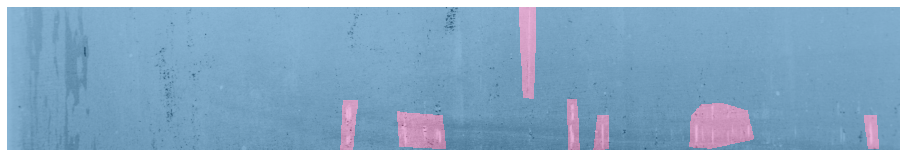

In [76]:
dls.show_batch(nrows=1, ncols=1, figsize=(16,8))

In [81]:
learn = unet_learner(dls, resnet18, loss_func=BCEWithLogitsLossFlat(), metrics=[Dice])
learn.fine_tune(1)

epoch,train_loss,valid_loss,dice,time


ValueError: Target size (torch.Size([211600])) must be the same as input size (torch.Size([1058000]))